In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [2]:
# constants
alpha = 5*10e-2

# initial conditions
T0 = 20

# boundary conditions
T_0 = 50
T_10 = 200

t = np.linspace(0,10,100)
guess1 = -20
guess2 = -23
def rhs(y, t):
    return [y[1], -alpha*(T0 - y[0])]

def print_description(y, t):
    print("T(10) = 200")
    print(f'T(10)_guess = {y[-1,0]}')

print_description(odeint(rhs, [T_0,guess1], t),t)
print_description(odeint(rhs, [T_0,guess2], t),t)

T(10) = 200
T(10)_guess = 1030.0783066501494
T(10) = 200
T(10)_guess = -1467.5725109681025


In [4]:
from scipy.optimize import brentq

def objective_func(T_guess):
    sol = odeint(rhs, [T_0, T_guess], t)
    T_final = sol[-1, 0]
    return T_final - T_10

print('T(a)=', objective_func(-20))
print('T(b)=', objective_func(-23))

T_prime = brentq(objective_func, -20, -23)
print(f'Optimized T prime using shooting method is T\'={T_prime} m/s')

T(a)= 830.0783066501494
T(b)= -1667.5725109681025
Optimized T prime using shooting method is T'=-20.99703087574244 m/s


In [5]:
guess3 = -20.99703087574244
print_description(odeint(rhs, [T_0,guess3], t),t)

T(10) = 200
T(10)_guess = 200.00000000000273


___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

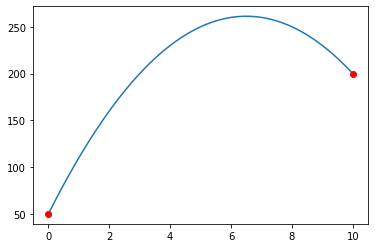

In [6]:
n = 1000
h = (10 - 0)/n

# Matrix A
A = np.zeros((n+1,n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

# Matrix B
b = np.zeros(n+1)
b[0] = 50
b[-1] = 200
for i in range(1,len(b)-1):
    b[i] = -alpha*(T0 - b[i-1])*h**2

y = np.linalg.solve(A, b)
t = np.linspace(0, 10, n + 1)
plt.plot(t, y)
plt.plot(0, 50, 'ro')
plt.plot(10, 200, 'ro')

In [7]:
y

array([ 50.        ,  50.6470273 ,  51.2955546 , ..., 200.6980449 ,
       200.34952248, 200.        ])